In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

from utils import quick_load_liuzhong_health_check_data, parse_dict_with_default, _get_fc_pvalue_tag
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## Scatter plot by months

In [2]:
_get_fc_pvalue_tag("LUNG.GroundGlassOpacity", m_end=13)

LUNG.GroundGlassOpacity
month 1, 2023 vs 2022, fold change 1.54, p=3.39e-10, n=2513, 6028
month 1, 2022 vs 2021, fold change 1.04, p=5.78e-01, n=6028, 5893
month 2, 2023 vs 2022, fold change 1.31, p=1.43e-05, n=6522, 3454
month 2, 2022 vs 2021, fold change 1.23, p=7.72e-03, n=3454, 3500
month 3, 2023 vs 2022, fold change 1.05, p=2.84e-01, n=6322, 5146
month 3, 2022 vs 2021, fold change 1.49, p=9.32e-14, n=5146, 5101
month 4, 2023 vs 2022, fold change 1.05, p=2.46e-01, n=8074, 5844
month 4, 2022 vs 2021, fold change 1.33, p=9.16e-10, n=5844, 6776
month 5, 2023 vs 2022, fold change 1.06, p=9.69e-02, n=9037, 8284
month 5, 2022 vs 2021, fold change 1.21, p=3.37e-06, n=8284, 7300
month 6, 2023 vs 2022, fold change 1.17, p=1.78e-05, n=8605, 8923
month 6, 2022 vs 2021, fold change 1.36, p=2.57e-13, n=8923, 8313
month 7, 2023 vs 2022, fold change nan, p=nan, n=0, 8756
month 7, 2022 vs 2021, fold change 1.43, p=7.98e-17, n=8756, 7989
month 8, 2023 vs 2022, fold change nan, p=nan, n=0, 10072
mon

In [3]:
_get_fc_pvalue_tag("LUNG.GroundGlassOpacity", m_end=-1)

LUNG.GroundGlassOpacity
All, 2023 vs 2022, fold change 1.11, p=8.46e-16, n=56010, 90751
All, 2022 vs 2021, fold change 1.30, p=8.98e-90, n=90751, 88920


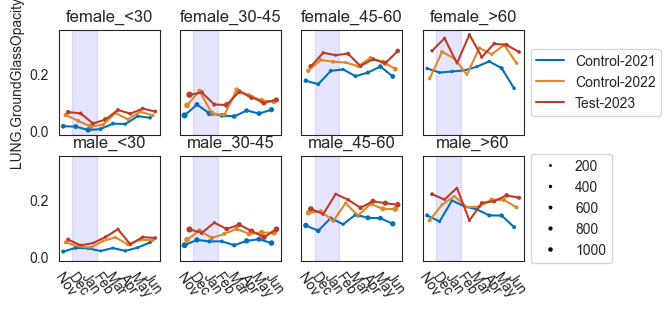

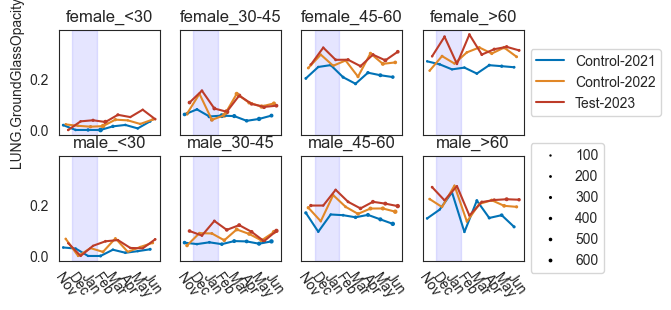

In [4]:
scatter_plot = Scatter(figsize=(6,3))
stack_plot = Stack(figsize=(4,4))

tag = "LUNG.GroundGlassOpacity"
l_months = [11,12,1,2,3,4,5,6]

fig,df_scatter_3p = scatter_plot.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
fig.savefig(f"{workdir}/Figure3_C.pdf")

fig,df_scatter_3p = scatter_plot.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.savefig(f"{workdir}/.Figure3_C-3y.pdf")

## Boxplot by months

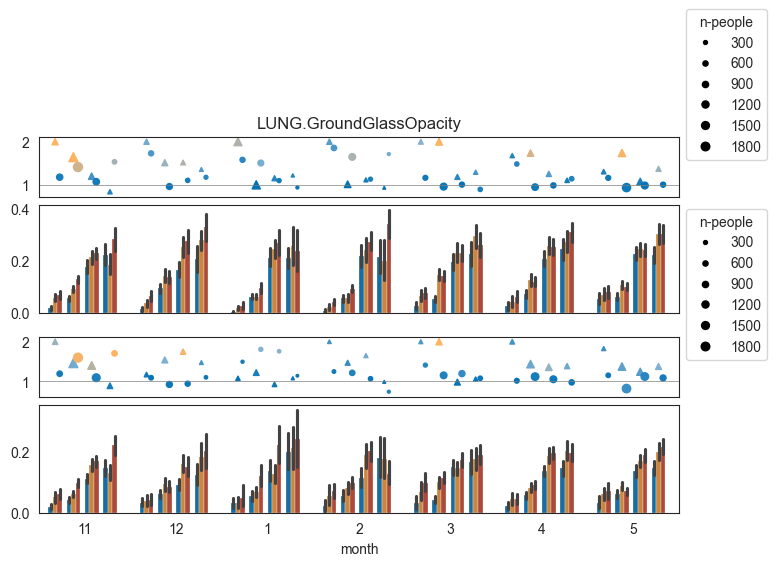

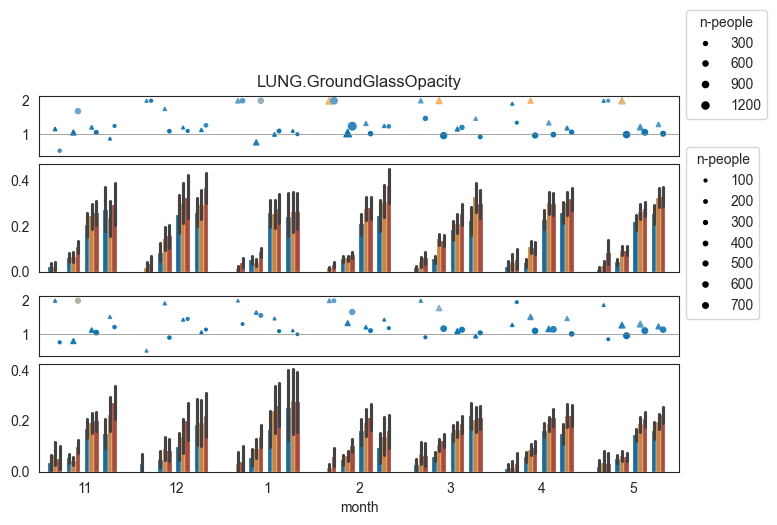

In [5]:
from plot_utils import BxxPvalue

plot_box = BxxPvalue(figsize=(8,4))
tag = "LUNG.GroundGlassOpacity"

fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus, x="month", y=tag,
                                   hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5], sns_type="bar"
)
fig.savefig(f"{workdir}/Figure3_D.pdf")

fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                   hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5], sns_type="bar"
)
fig.savefig(f"{workdir}/.Figure3_D-3y.pdf")

## Stack for all features

lung_state,period,month,LUNG.GroundGlassOpacity,Normal,total
0,Control-2021,1,8.072009,91.869919,1722
1,Control-2021,2,5.873606,94.076828,4035
2,Control-2021,3,9.729401,90.179386,3289
3,Control-2021,4,12.102531,87.767683,3082
4,Control-2021,5,12.010143,87.874597,4338
5,Control-2021,6,10.257669,89.595092,4075
6,Control-2021,11,9.882455,89.638659,2297
7,Control-2021,12,11.590038,87.260536,1044
8,Control-2022,1,9.523810,90.418118,1722
9,Control-2022,2,8.153656,91.796778,4035


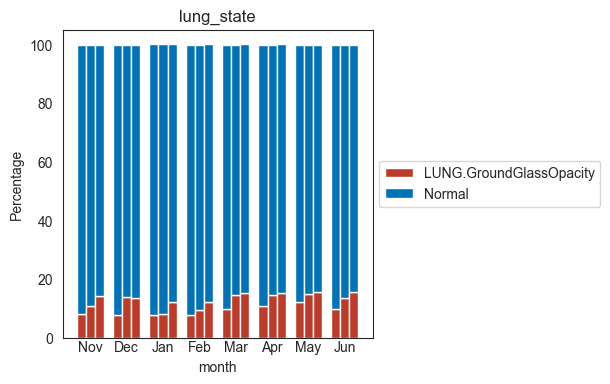

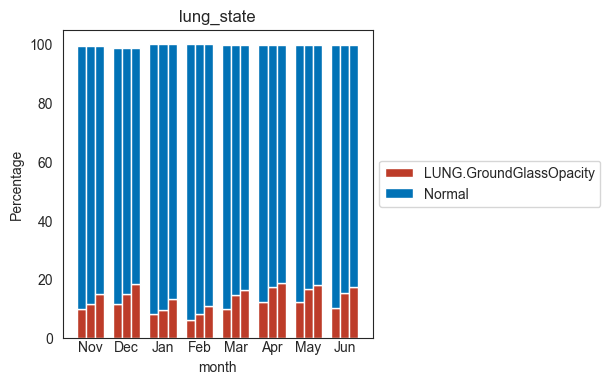

In [6]:
x = "month"
order= [11,12, 1,2,3, 4,5,6]
hue = "period"
hue_order = ["Control-2021", "Control-2022", "Test-2023"]
y = "lung_state"
y_order = ["LUNG.GroundGlassOpacity"]
pal = ["#BD3C29", "#0172B6", "#E18727", "#21854F", "#787681"]



fig,stack_data = stack_plot.plot_bar_stacked(df_table1plus, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=pal)
fig.savefig(f"{workdir}/Figure3_B.pdf")

fig,stack_data = stack_plot.plot_bar_stacked(df_table1plus_3p_revMM, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=pal)
fig.savefig(f"{workdir}/.Figure3_B-3y.pdf")
stack_data

## Scatter for all features

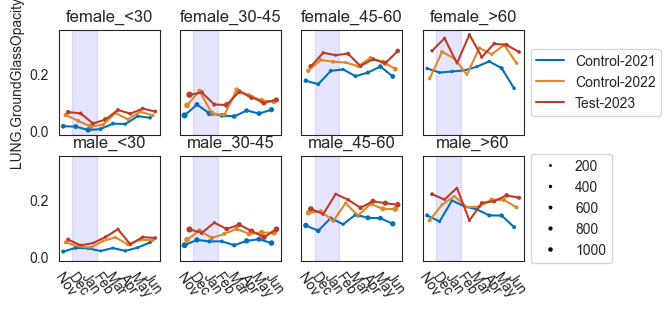

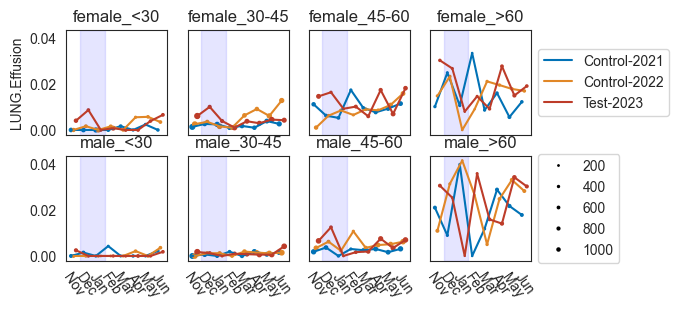

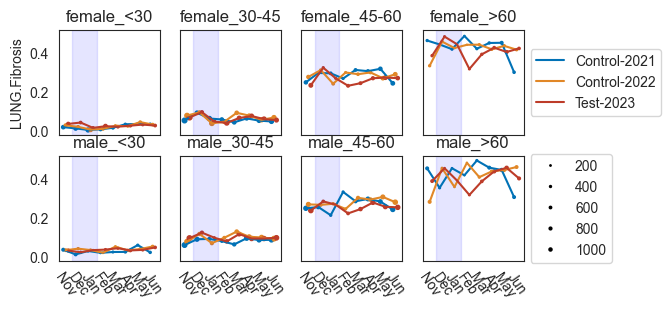

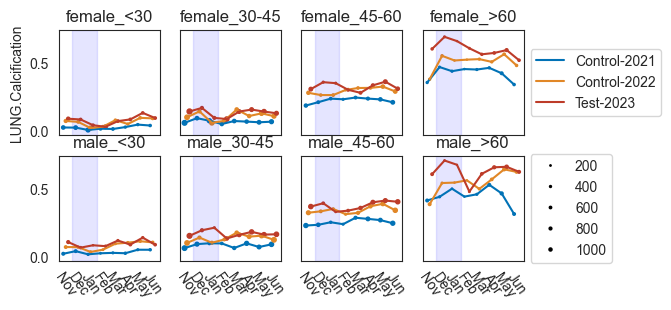

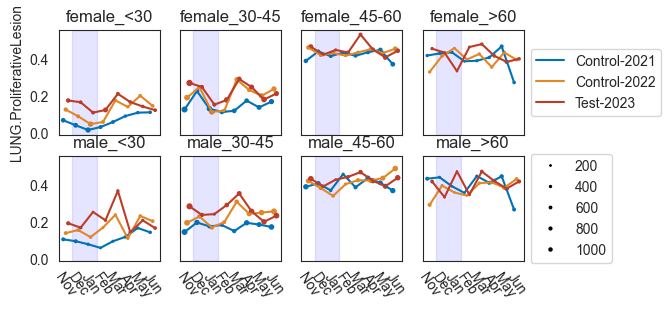

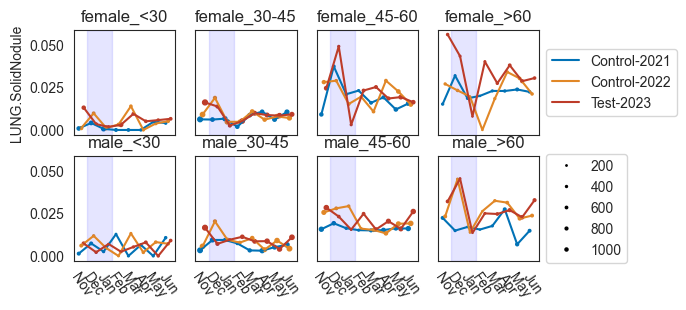

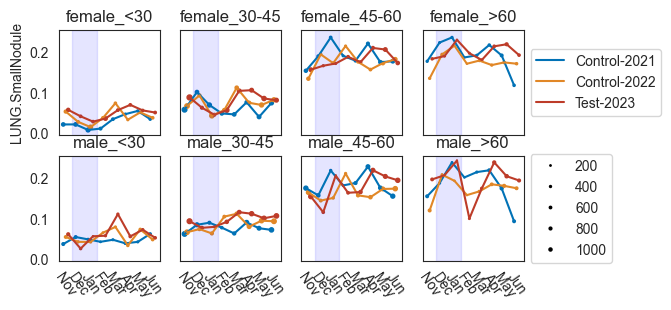

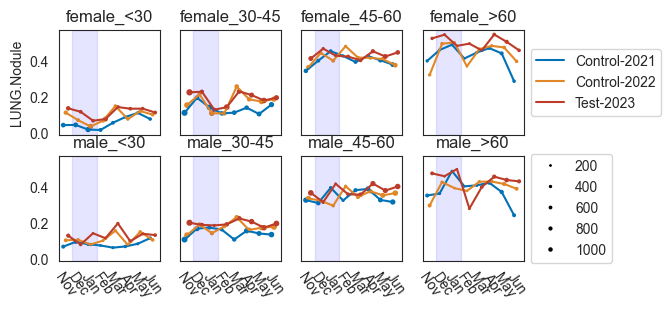

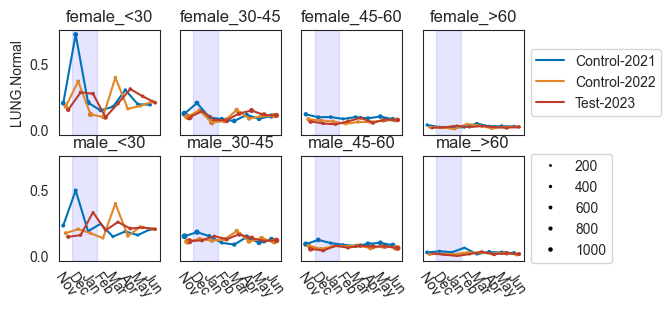

In [7]:
l_tags = ["LUNG.GroundGlassOpacity", "LUNG.Effusion", "LUNG.Fibrosis", "LUNG.Calcification", "LUNG.ProliferativeLesion",
    "LUNG.SolidNodule", "LUNG.SmallNodule", "LUNG.Nodule", "LUNG.Normal"
]
for tag in l_tags:
    fig,_ = scatter_plot.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)


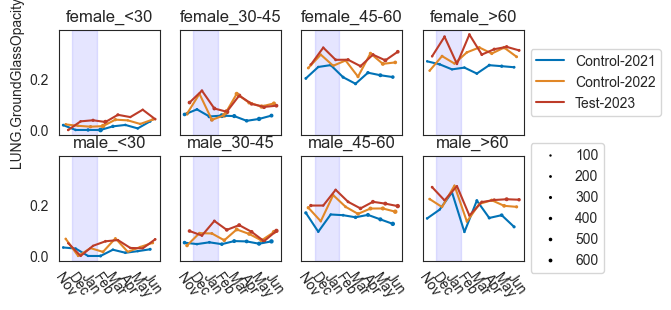

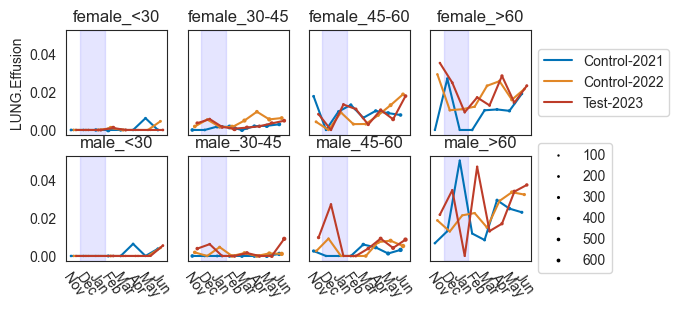

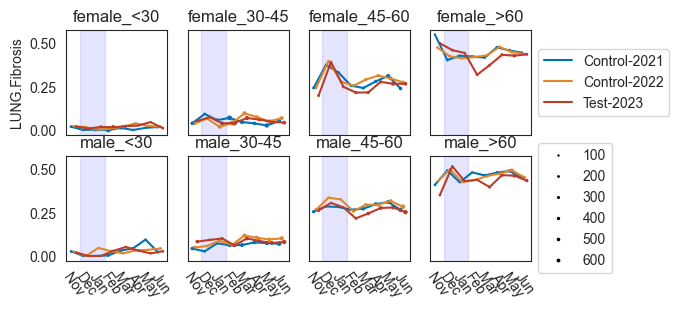

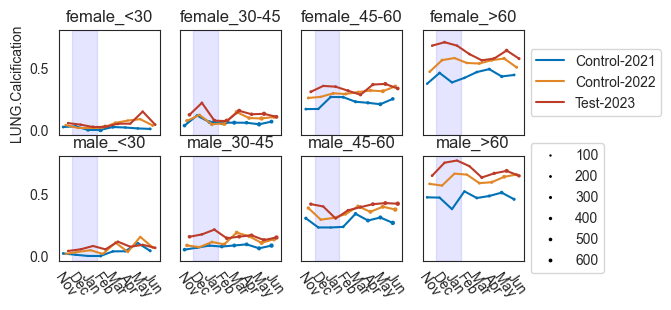

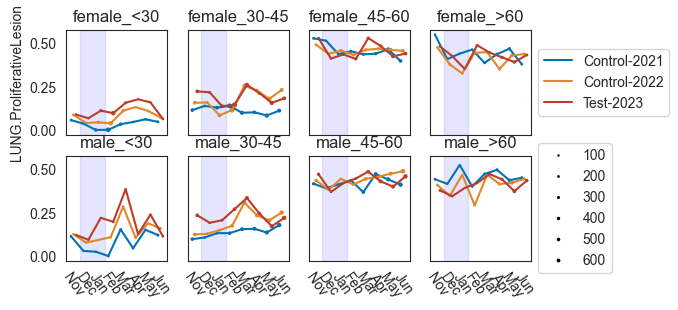

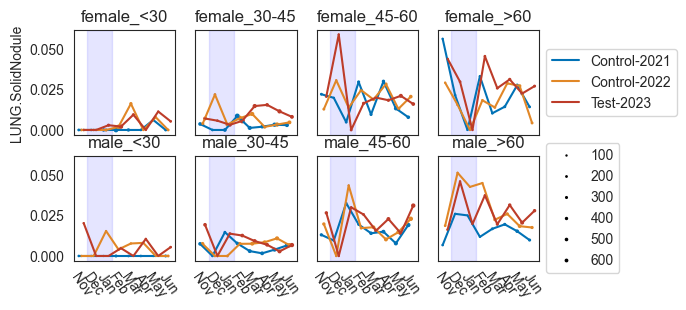

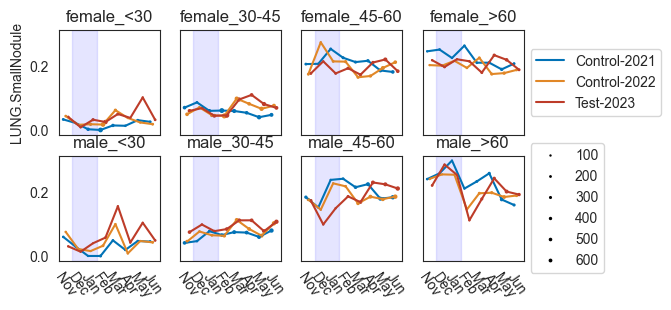

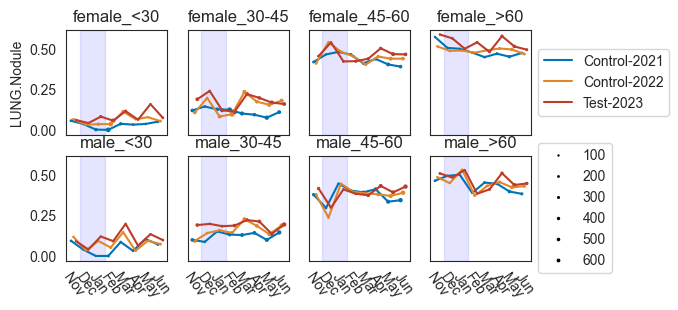

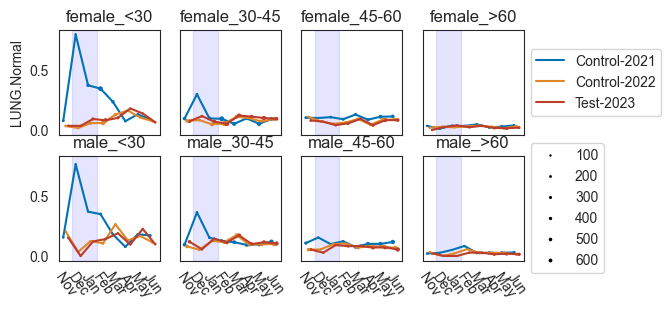

In [8]:
l_tags = ["LUNG.GroundGlassOpacity", "LUNG.Effusion", "LUNG.Fibrosis", "LUNG.Calcification", "LUNG.ProliferativeLesion",
    "LUNG.SolidNodule", "LUNG.SmallNodule", "LUNG.Nodule", "LUNG.Normal"
]
for tag in l_tags:
    fig,_ = scatter_plot.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


## Barplot for lung states in 3 periods

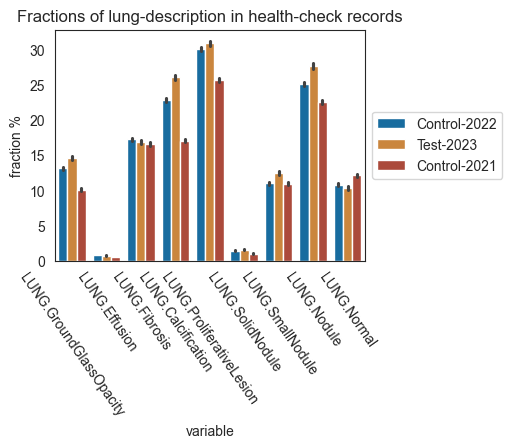

In [9]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = pd.melt(
    df_table1plus[l_tags + ["period"]],
    id_vars=["period"]
)
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="variable", y="value", hue="period", palette=my_pal, ax=ax)
ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of lung-description in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/.Figure3_A-all.pdf")

In [10]:
df_plot.pivot_table(index="variable", columns="period", values="value", aggfunc=np.mean)

period,Control-2021,Control-2022,Test-2023
variable,,,
LUNG.Calcification,17.033288,22.781016,26.068559
LUNG.Effusion,0.518444,0.796685,0.721300
LUNG.Fibrosis,16.577823,17.237276,16.807713
LUNG.GroundGlassOpacity,10.093342,13.130434,14.617033
LUNG.Nodule,22.512371,25.131404,27.686127
LUNG.Normal,12.139001,10.778945,10.303517
LUNG.ProliferativeLesion,25.598291,30.065784,30.867702
LUNG.SmallNodule,10.915430,10.976188,12.494197
LUNG.SolidNodule,0.991903,1.368580,1.560436


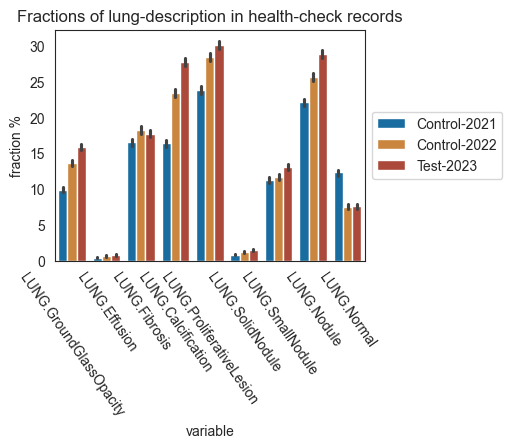

In [11]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = pd.melt(
    df_table1plus_3p_revMM[l_tags + ["period"]],
    id_vars=["period"]
)
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="variable", y="value", hue="period", palette=my_pal, ax=ax)
ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of lung-description in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/Figure3_A.pdf")

## Barplot for GroundGlassOpacity-state of Jan in 3 periods

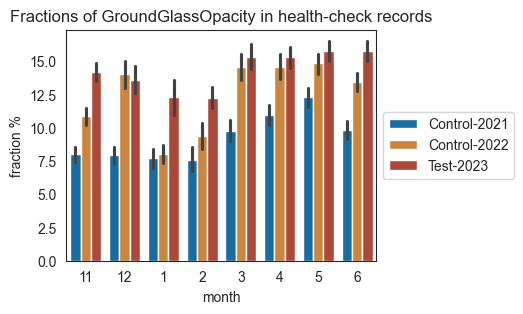

In [12]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = df_table1plus[l_tags[0:1]+["period", "month"]]
df_plot.columns = ["value", "period", "month"]
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="month", y="value", hue="period", palette=my_pal, ax=ax, order=[11,12,1,2,3,4,5,6])
# ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of GroundGlassOpacity in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/.FigureS3_C-all.pdf")

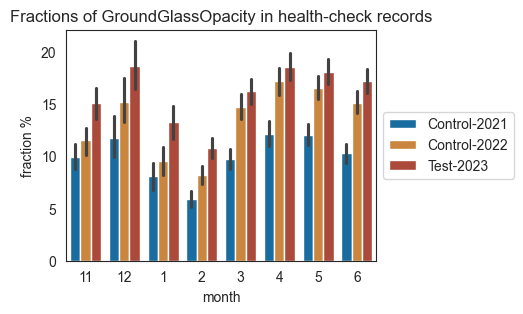

In [13]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = df_table1plus_3p_revMM[l_tags[0:1]+["period", "month"]]
df_plot.columns = ["value", "period", "month"]
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="month", y="value", hue="period", palette=my_pal, ax=ax, order=[11,12,1,2,3,4,5,6])
# ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of GroundGlassOpacity in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/FigureS4_A.pdf")

## Sankey plot of GroundGlassOpacity

In [14]:
df_cnt = pd.melt(
        df_table1plus_3p_revMM[ ["sample_id",'LUNG.GroundGlassOpacity', "LUNG.Calcification", "period", "month", "age_groups","gender"] ],
        id_vars = ["sample_id", "month", "period", "age_groups", "gender"]
    ).pivot(
        index=["sample_id","variable", "month", "age_groups", "gender"], 
        columns="period", 
        values="value"
    ).reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()


from plot_utils import Sankey
import plotly.io as pio

sankey_plot = Sankey()

l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "LUNG.GroundGlassOpacity"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

fig, _ = sankey_plot.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs, prefix="Figure3_[11,12]", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_B_[11,12].pdf")
fig, sankey_obj = sankey_plot.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs, prefix="Figure3", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_B_[1,2].pdf")
fig, sankey_obj = sankey_plot.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs, prefix="Figure3_[3,4]", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_B_[3,4].pdf")

## Sankey plot of Calification

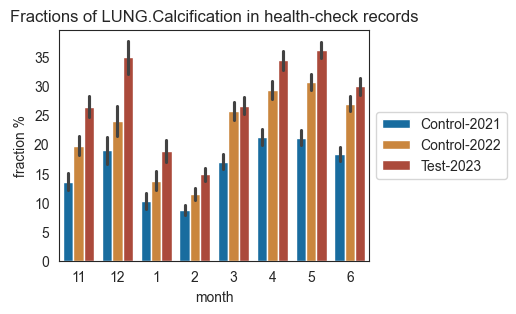

In [15]:
tag = "LUNG.Calcification"
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = df_table1plus_3p_revMM[[tag]+["period", "month"]]
df_plot.columns = ["value", "period", "month"]
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="month", y="value", hue="period", palette=my_pal, ax=ax, order=[11,12,1,2,3,4,5,6])
# ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title(f"Fractions of {tag} in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/FigureS4_C.pdf")

In [16]:
tag = "LUNG.Calcification"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

fig, _ = sankey_plot.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs, prefix="Figure3_[11,12]", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_D_[11,12].pdf")
fig, sankey_obj = sankey_plot.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs, prefix="Figure3", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_D_[1,2].pdf")
fig, sankey_obj = sankey_plot.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs, prefix="Figure3_[3,4]", by_gender=False)
pio.write_image(fig, f"{workdir}/FigureS4_D_[3,4].pdf")

## Check lung states

In [17]:
%%time
dir_path = "/cluster/home/bqhu_jh/projects/healthman/"

df_main   = pd.read_parquet(f"{dir_path}/analysis/main.parquet")
df_merged = pd.read_parquet(f"{dir_path}/analysis/detail.parquet")
df_main.loc[
        df_main["sample_id"]=="Mzi4RtCk8Er3epHz17cxM8ytDzhxZ9ZxW1K5NNZKUwt3ug==", "birthday"
] = "1977-05-27"


CPU times: user 22.3 s, sys: 5.51 s, total: 27.8 s
Wall time: 18.4 s


In [18]:
from utils import parse_man_info
def detect_descriptions(x, descriptions):
    if pd.isna(x):
        return x
    
    for description in descriptions.split("|"):
        if re.search(description, x):
            return 1
    return 0


def aggr_table(x):
    try:
        return np.nanmean([float(v) for v in x])
    except:
        return ";".join(str(v) for v in x)


def extract_text_from_details(df_merged, scan_items, dict_descriptions):
    df_tmp_pvt = df_merged[df_merged["combine_item_name"].\
                isin(scan_items)]\
                [["exam_id", "conclusion", "operation_date"]].\
                pivot_table(index=["exam_id", "operation_date"], values="conclusion", aggfunc=aggr_table)

    for k in dict_descriptions:
        v = dict_descriptions[k]
        df_tmp_pvt[v] = df_tmp_pvt["conclusion"].apply(lambda x: detect_descriptions(x, k))

    return df_tmp_pvt.reset_index()




scan_items = ["胸部CT平扫", "肺部CT平扫", "数字化摄影(DR)", "+胸部CT平扫", "CT胸部平扫", "CT肺部HR平扫"]
dict_descriptions = {
    "磨玻璃": "LUNG.GroundGlassOpacity",
    "积液": "LUNG.Effusion",
    "纤维": "LUNG.Fibrosis",
    "钙化": "LUNG.Calcification",
    "增殖灶": "LUNG.ProliferativeLesion",
    "实性结节": "LUNG.SolidNodule",
    "小结节": "LUNG.SmallNodule",
    "结节": "LUNG.Nodule",
    "未见明显异常": "LUNG.Normal"
}

df_lung_pvt = extract_text_from_details(df_merged, scan_items, dict_descriptions)
df_lung_pvt[["year", "month"]] = pd.DataFrame({
    "year": [  int(x.split("-")[0]) for x in df_lung_pvt["operation_date"] ],
    "month": [ int(x.split("-")[1]) for x in df_lung_pvt["operation_date"] ],
})
df_lung_pvt.index = df_lung_pvt["exam_id"]

df_lung_table = df_main.join(df_lung_pvt, how="right")
df_lung_table = parse_man_info(df_lung_table)
df_merged[df_merged["combine_item_name"].isin(scan_items)]["conclusion"].value_counts().reset_index().tail(40)

,index,conclusion
79639,右肺两枚磨玻璃结节，建议年度复查。\n两肺增殖灶。\n左侧肺间裂炎性病变考虑。,1
79640,两肺多发小结节，部分可见空泡征，建议随访。,1
79641,右肺小结节，增殖灶考虑，请结合临床随诊。,1
79642,右肺中上叶纤维灶。\n两肺少许增殖灶考虑。对照2020-05-20CT相仿。\n附见：右乳术...,1
79643,右肺上叶后段磨玻璃结节影，建议年度复查。\n右下肺少许增殖灶。,1
79644,两肺实性结节，倾向增殖钙化灶考虑。,1
79645,右肺下叶实性结节，倾向良性结节。,1
79646,右肺上叶增殖灶，必要时年度随诊复查。,1
79647,右肺上叶微小结节，良性倾向。\n附见：脂肪肝。,1
79648,两肺上叶及右肺中叶支气管扩张伴慢性炎症。\n两肺散在纤维增殖灶。\n升主动脉增粗，胸主动脉及...,1
